In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import dataAgglomeration as da
from matplotlib import rcParams
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.lines import Line2D
rcParams["figure.dpi"] = 400

In [13]:
def plot_schemes_dframe(dframe,DYJEAT_dframe,title):
    """Plots the temporal evolution of the L-INFINITY velocity error norm for each mesh resolution and density ratio."""
    
    rcParams["figure.dpi"] = 400
    # Create the main figure and axis
    fig, ax = plt.subplots()
    
    # Create a zoomed-in subfigure
    sub_ax1 = plt.axes([1.05, 0.5, 0.4, 0.4])  # [left, bottom, width, height]
    sub_ax2 = plt.axes([1.05, 0, 0.4, 0.4])
    
    #dframe=dframe.loc[idx[divScheme]]
    #schemes = dframe.index.get_level_values("fluxSchemes").unique()
    fluxSchemes = ["upwind", "cubic","limitedLinearV","linear","LUST","MUSCL", "QUICK", "SuperBee", "vanLeer"]
    #schemes=["cubic"]
    timeSchemes = ["Euler"]#dframe.index.get_level_values("CFL_num").unique()
    resolutions = [256]#[128] #dframe.index.get_level_values("resolution").unique()
    
    for resolution in resolutions:
        for fluxScheme in fluxSchemes:
            for timeScheme in timeSchemes: 
                df_subset = dframe.loc[timeScheme,fluxScheme,:]#, resolution,:]
                MOMx=df_subset["MOMx"]
                MOMy=df_subset["MOMy"]
                MOMz=df_subset["MOMz"]
                MOM=((MOMx)**2+(MOMy)**2+(MOMz)**2)**0.5
                ax.plot(df_subset["time"], (MOM-MOM[0])/MOM[0],#((MOMx-MOMx[0])**2+(MOMy-MOMy[0])**2+(MOMz-MOMz[0])**2)**0.5/MOM0, 
                             label=" Euler+%s; N%s" % (fluxScheme, resolution))
                sub_ax1.plot(df_subset["time"], (MOM-MOM[0])/MOM[0],
                           label=" Euler+%s; N%s" % (fluxScheme, resolution))#((MOMx-MOMx[0])**2+(MOMy-MOMy[0])**2+(MOMz-MOMz[0])**2)**0.5/MOM0)
                sub_ax2.plot(df_subset["time"], (MOM-MOM[0])/MOM[0],
                           label=" Euler+%s; N%s" % (fluxScheme, resolution))
                    
    dframe_N128_CN_upwind = dframe.loc[(dframe.index.get_level_values('timeSchemes') == "CrankNicolson") & (dframe.index.get_level_values('fluxSchemes') == "upwind")]

    for df in (dframe_N128_CN_upwind, DYJEAT_dframe):
        if df.equals(dframe_N128_CN_upwind):
            label_h = "CrankNicolson+upwind"
            c = '#17becf'
        else:
            label_h = "DYJEAT"
            c= '#778899'
        MOMx=df["MOMx"]
        MOMy=df["MOMy"]
        MOMz=df["MOMz"]
        MOM=((MOMx)**2+(MOMy)**2+(MOMz)**2)**0.5
        ax.plot(df["time"], (MOM-MOM[0])/MOM[0],color=c,#((MOMx-MOMx[0])**2+(MOMy-MOMy[0])**2+(MOMz-MOMz[0])**2)**0.5/MOM0, 
                                 label=" %s; N%s" % (label_h, resolution))
        sub_ax1.plot(df["time"], (MOM-MOM[0])/MOM[0],color=c,
                   label=" %s; N%s" % (label_h, resolution))#((MOMx-MOMx[0])**2+(MOMy-MOMy[0])**2+(MOMz-MOMz[0])**2)**0.5/MOM0)
        sub_ax2.plot(df["time"], (MOM-MOM[0])/MOM[0],color=c,
                   label=" %s; N%s" % (label_h, resolution))
    
    sub_ax1.set_xlim(left=0.0025)
    sub_ax1.set_ylim(-4e-2, 4e-2)
    sub_ax1.set_yscale('symlog')
    sub_ax1.set_yticks(list(sub_ax1.get_yticks()) + [0])
    sub_ax2.set_xlim(left=0.0025)
    sub_ax2.set_ylim(-1e-4, 1e-4)
    sub_ax2.set_yscale('symlog')
    sub_ax2.set_yticks(list(sub_ax2.get_yticks()) + [0])
    
    ### set special legend for zoomed-in 
    handles, labels = sub_ax2.get_legend_handles_labels()#legend.get_handles_labels()
    
    # Create a new list to store modified labels
    modified_handles=[]
    modified_labels = []

    # Iterate over the handles and labels
    for handle, label in zip(handles, labels):
        # Get the x-data from the handle
        xdata = handle.get_xdata()
        ydata = handle.get_ydata()

        # Check if any x-data is within the x-limits
        if any((x >= sub_ax1.get_xlim()[0]) and (x <= sub_ax1.get_xlim()[1]) and (y >= sub_ax1.get_ylim()[0]) and (y <= sub_ax1.get_ylim()[1]) for x, y in zip(xdata,ydata)):#for x in xdata):
            modified_labels.append(label)
            modified_handles.append(handle)

    sub_ax2.legend(modified_handles, modified_labels,loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1)

    ax.set_xlim(0,0.0031)
    ax.set_ylim(-1, 1e6) #(-1e-6, 1.42e-5)
    ax.set_ylabel(title)
    ax.set_xlabel("Time in seconds")
    ax.set_yscale('symlog')
    #plt.yscale('log')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)
    
    rect = patches.Rectangle((0.0025, -0.35), 0.00055, 0.7, linestyle='dashed', edgecolor='black', facecolor='none')    
    ax.add_patch(rect)
    
    top_left=[1.05, 0.9]
    bottom_left=[1.05, 0]
    top_right=ax.transData.transform((0.00305, 0.35))
    top_right=fig.transFigure.inverted().transform(top_right)
    bottom_right=ax.transData.transform((0.00305, -0.35))
    bottom_right=fig.transFigure.inverted().transform(bottom_right)
    line1 = Line2D((top_right[0], top_left[0]),(top_right[1], top_left[1]), transform=fig.transFigure, color='gray',alpha=0.5)#, linestyle='dashed')
    line2 = Line2D((bottom_right[0], bottom_left[0]),(bottom_right[1], bottom_left[1]), transform=fig.transFigure, color='gray',alpha=0.5)#, linestyle='dashed')

    # Add the line to the figure
    fig.add_artist(line1)
    fig.add_artist(line2)

    
    # Show the plot
    plt.show()

In [3]:
agglomerator = da.data_agglomerator("mixingLayer2D.parameter","SumKinE.dat", 
                                     "./isoAdv-mixingLayer2D_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("isoAdv-mixingLayer2D.csv")
dframe_isoAdv_SumMOM = agglomerator.study_dataframe()
dframe_isoAdv_SumMOM = dframe_isoAdv_SumMOM.sort_index()

agglomerator = da.data_agglomerator("mixingLayer2D.parameter","SumKinE.dat", 
                                     "./isoRho-mixingLayer2D_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("isoRho-mixingLayer2D.csv")
dframe_isoRho_SumMOM = agglomerator.study_dataframe()
dframe_isoRho_SumMOM = dframe_isoRho_SumMOM.sort_index()

MOM_vals = np.loadtxt('INT_momentum.plt',skiprows=2, unpack=True)
DYJET_df = pd.DataFrame(MOM_vals, index=['time','MOMx','MOMy','MOMz']).T
#dframe_isoAdv_SumMOM_N128_Euler = dframe_isoAdv_SumMOM.loc[(dframe_isoAdv_SumMOM.index.get_level_values('resolution') == 128) & (dframe_isoAdv_SumMOM.index.get_level_values('timeSchemes') == "Euler")]
#dframe_isoAdv_SumMOM_N128_CN_upwind = dframe_isoAdv_SumMOM.loc[(dframe_isoAdv_SumMOM.index.get_level_values('resolution') == 128) & (dframe_isoAdv_SumMOM.index.get_level_values('timeSchemes') == "CrankNicolson") & (dframe_isoAdv_SumMOM.index.get_level_values('fluxSchemes') == "upwind")]

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[[0.05], ['CrankNicolson', 'Euler'], ['LUST', 'MUSCL', 'QUICK', 'SuperBee', 'cubic', 'limitedLinearV', 'linear', 'upwind', 'vanLeer'], [256], [0.0], [0.0], [1], [0.0], [1000], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['CFL_num', 'timeSchemes', 'fluxSchemes', 'resolution', 'surface_tension_coefficient', 'nu_ambient', 'rho_ambient', 'nu_droplet', 'rho_droplet', 'step']
Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[[0.05], ['CrankNicolson', 'Euler'], ['LUST', 'MUSCL', 'QUIC

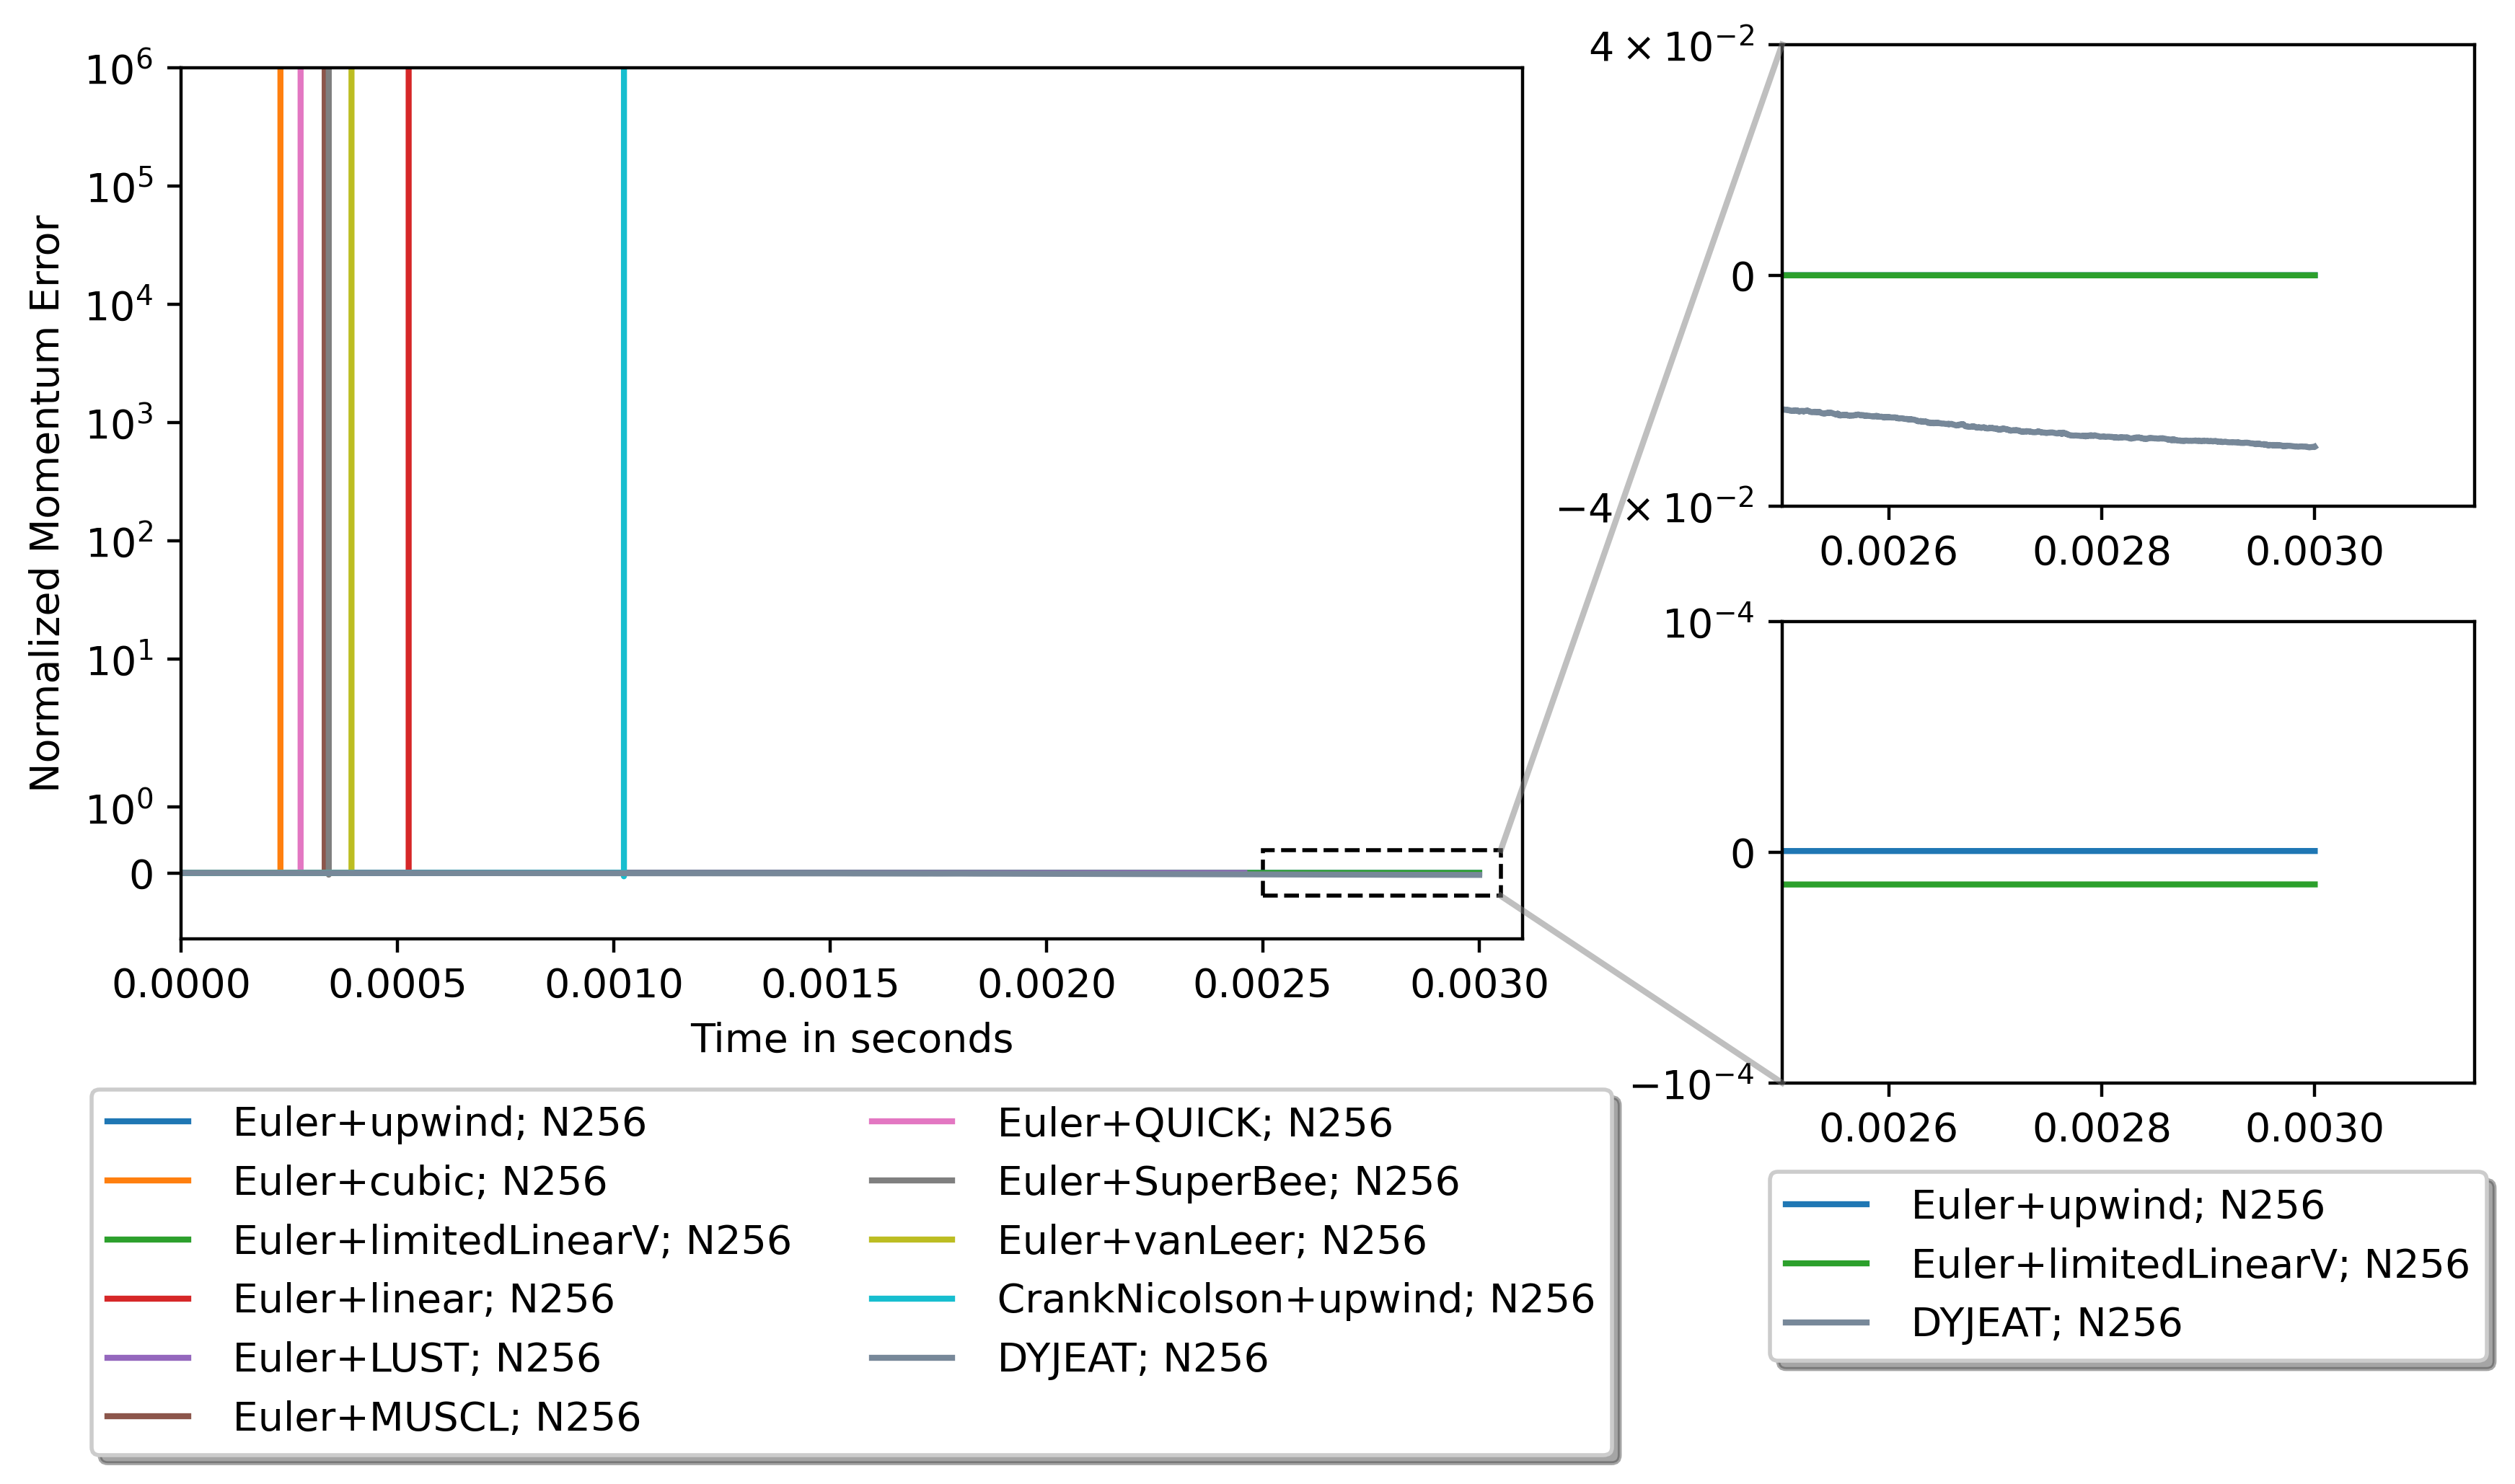

In [14]:
plot_schemes_dframe(dframe_isoAdv_SumMOM,DYJET_df,"Normalized Momentum Error")

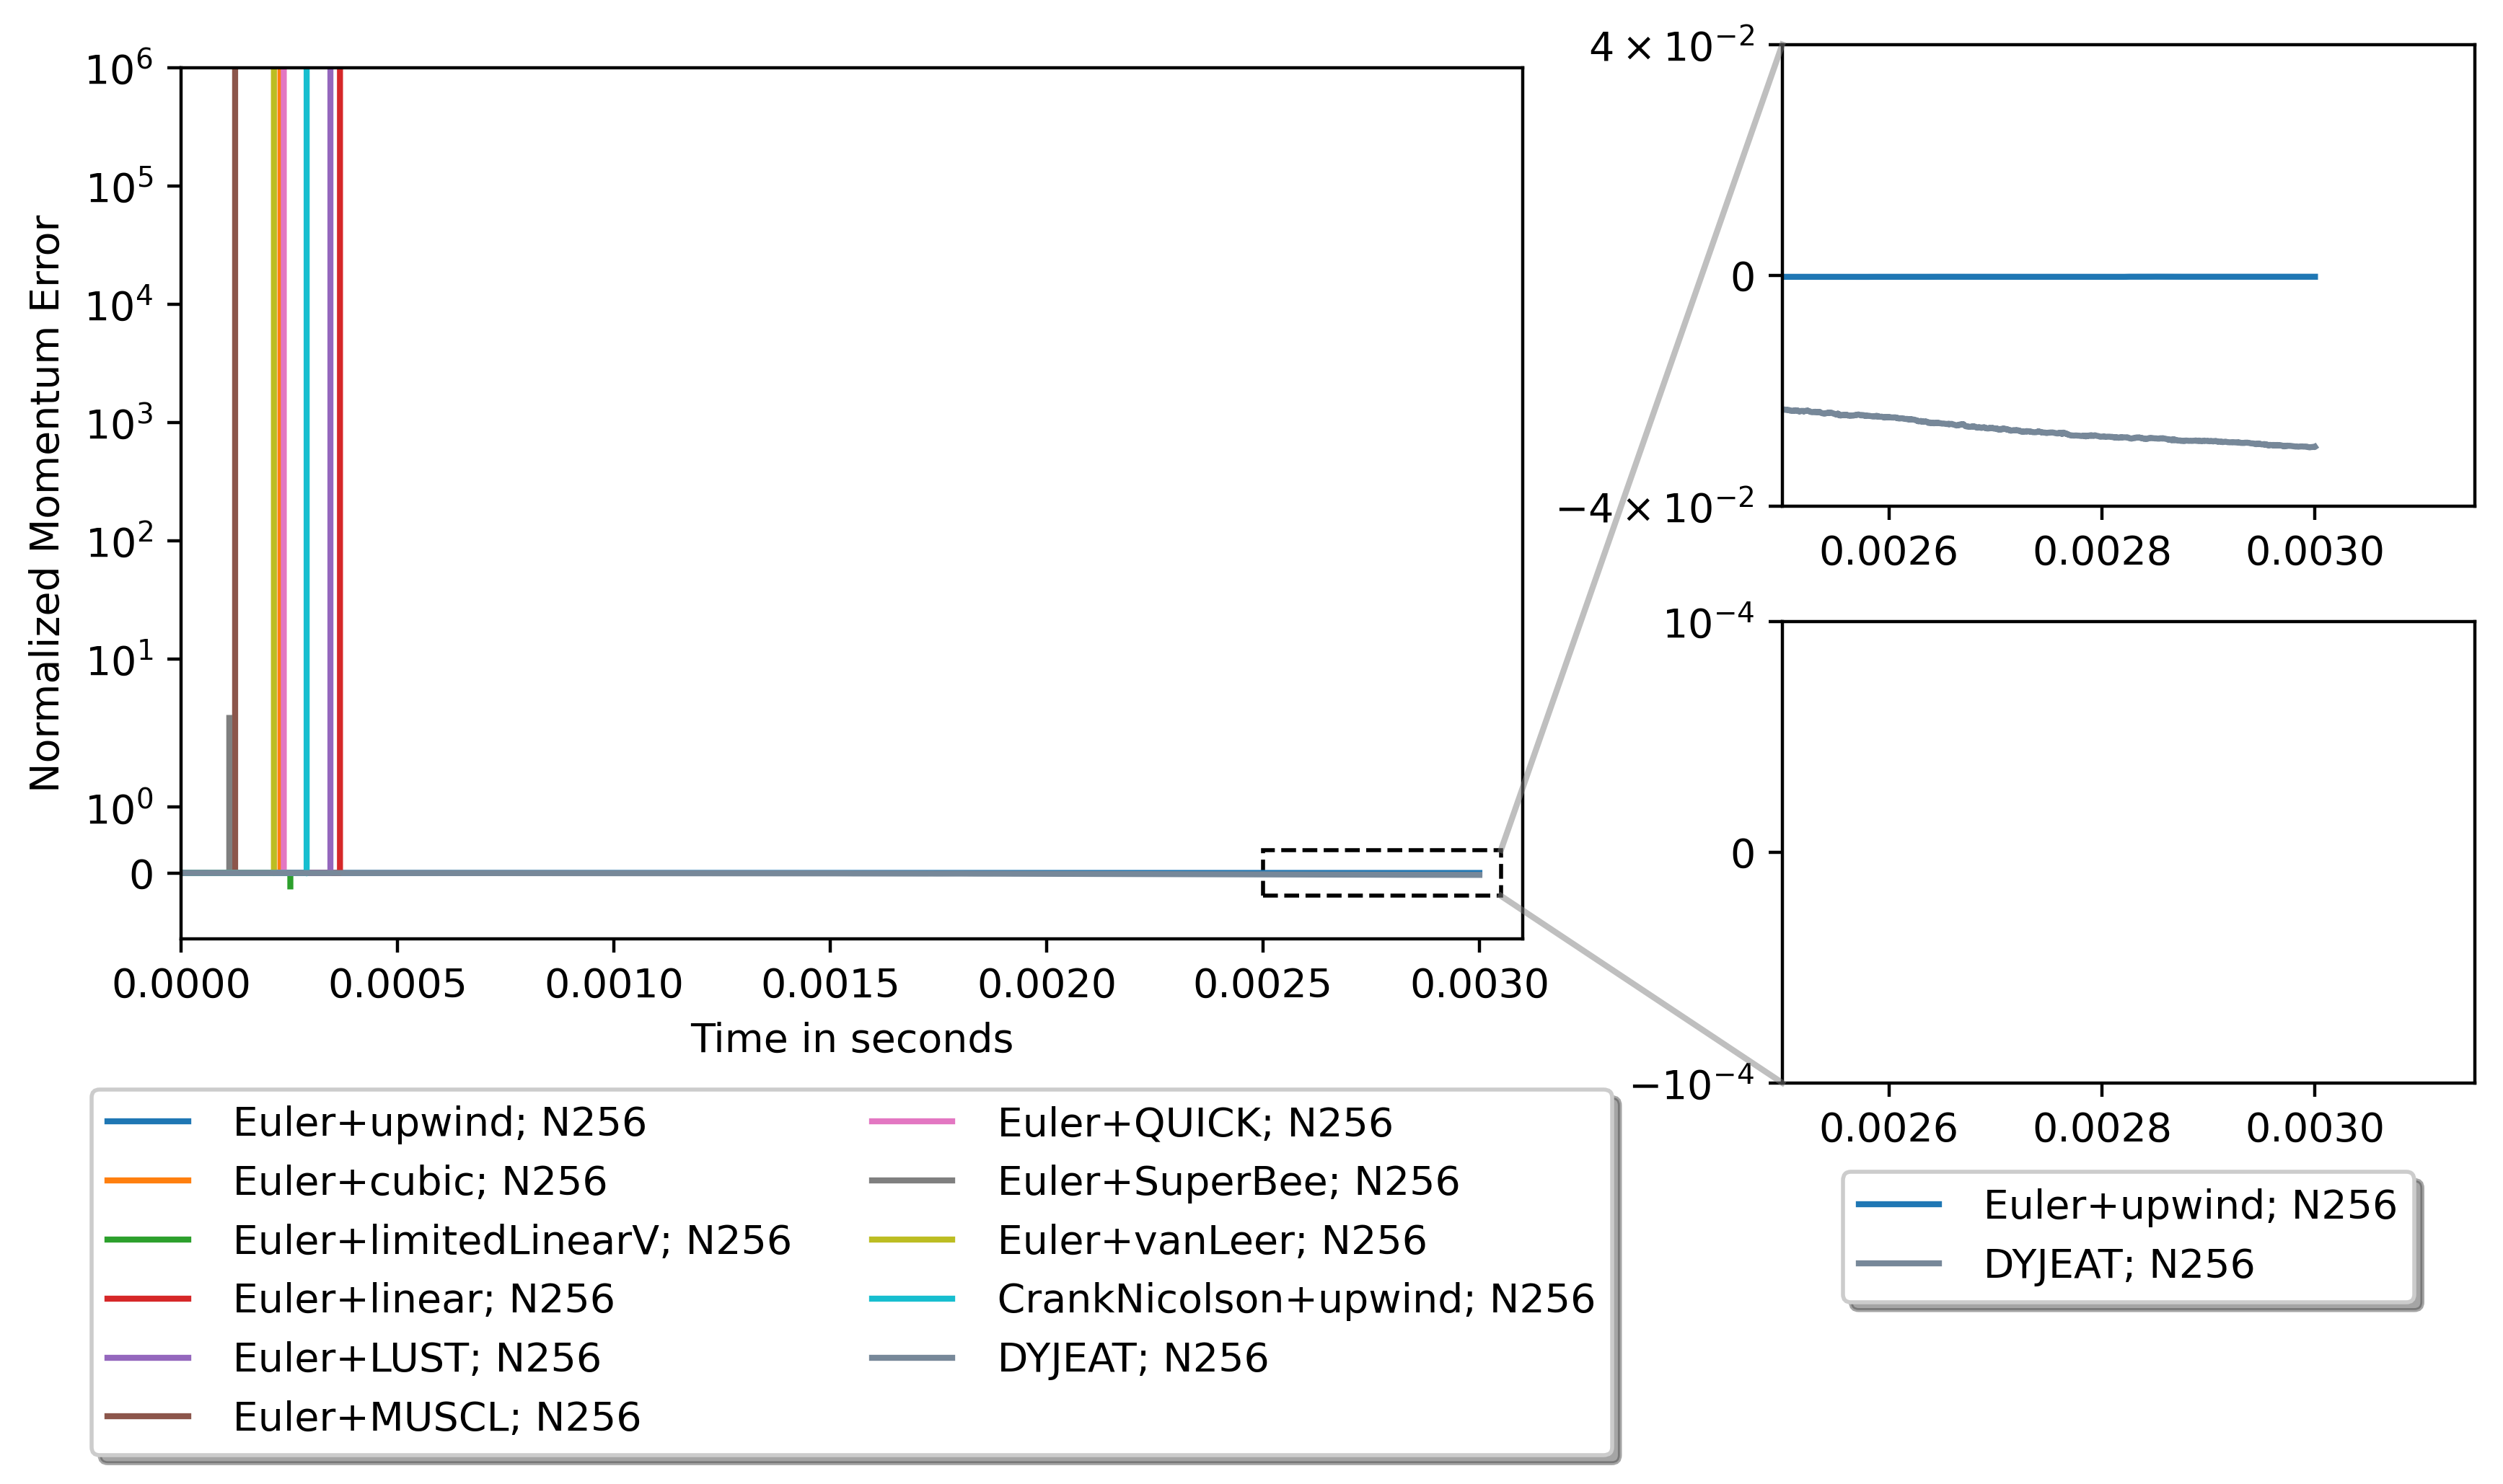

In [15]:
plot_schemes_dframe(dframe_isoRho_SumMOM,DYJET_df,"Normalized Momentum Error")